# Load Libs

In [1]:
### Load Python Lib##### 
########
import numpy as np
from math import *
import matplotlib.pyplot as plt
from random import gauss, randint
from matplotlib import rc
from matplotlib.ticker import FixedLocator, MultipleLocator, FormatStrFormatter
import time
from scipy.special import spence
import scipy.optimize
from scipy import stats
import itertools

#very import to enable this so the plots can be showed in the page
get_ipython().magic(u'matplotlib inline')

# Use LaTeX font.
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['Computer Modern Roman'],'size':20})

import matplotlib.font_manager as font_manager
font_prop = font_manager.FontProperties(size=12)

Deg2Rad = 3.1415926/180.0

# Load MC Data with Target Polarization at $90^0$

In [2]:
### Loading the theoretical calculations
filename1 = './database/n_asym_up_0.dat'
lines1 = open(filename1,'r').readlines()

N = 8
W = np.zeros(N, dtype=float)
Q2 = np.zeros(N, dtype=float)
x = np.zeros(N, dtype=float)
t = np.zeros(N, dtype=float)
Epsilon = np.zeros(N, dtype=float)
R = np.zeros(N, dtype=float)
F = np.zeros(N, dtype=float)     
XS = np.zeros(N, dtype=float)  
Asym= np.zeros(N, dtype=float)  
Astat = np.zeros(N, dtype=float) 
N_out = np.zeros(N, dtype=float)   
N_raw = np.zeros(N, dtype=float)   
N_pim = np.zeros(N, dtype=float)   

N1 = 12
N2 = 12
Bin = (N, N1, N2)
PhiS = np.zeros(Bin, dtype=float)
PhiH = np.zeros(Bin, dtype=float)
Ncnt = np.zeros(Bin, dtype=float)
N1m1 = np.zeros(Bin, dtype=float)

#BinS = np.zeros((N, N1), dtype=int)
#BinH = np.zeros((N, N2), dtype=int)

## Reading in each -t bin
N_Bin =0
Q2_avg = 0.0
W_avg = 0.0
for i in range(0, N):
    values=lines1[N_Bin].split()
    values = np.array(values,dtype=float)
    Q2[i]=(values[1])
    x[i]=(values[2])
    W[i]=(values[3])
    t[i]=(values[4])
    Epsilon[i]=(values[5])
    R[i]=(values[6])
    F[i]=(values[7])
    XS[i]=(values[8])
    Asym[i]=(values[9])
    Astat[i]=(values[10])
    N_out[i]=(values[11])
    Astat[i] = 1./sqrt(N_out[i])
    N_raw[i]=(values[12])
    
    Q2_avg += Q2[i]
    W_avg += W[i]
    
    ## Reading in Phi_S and Phi_h bins for each -t bin
    for j in range(0, N1):
        for k in range(0, N2):
            N_phi = (N_Bin+1) + k + j*N2
            values=lines1[N_phi].split()
            values = np.array(values, dtype=float)
                       
            if j!=int(values[0]) or k!=int(values[1]):
               print "*** ERROR, j!=%d/%d, k!=%d/%d"%(j, int(values[0]), k, int(values[1]))
            
            PhiS[i][j][k] = values[2] * Deg2Rad
            PhiH[i][j][k] = values[3] * Deg2Rad
            Ncnt[i][j][k] = values[4]
            N1m1[i][j][k] = values[5]
            #print "i=%d: %d  %d  %12.4f  %12.4f  %12.4e  %12.4e"%(i,j,k, PhiS[i][j][k]/Deg2Rad, PhiH[i][j][k]/Deg2Rad, Ncnt[i][j][k], Nstat[i][j][k])  
    
    N_Bin+=N1*N2 + 1
    
Q2_avg /= N
W_avg /=N

# Load MC Data with Target Polarization at $-90^0$

In [3]:
### Loading the theoretical calculations
filename2 = './database/n_asym_down_0.dat'
lines2 = open(filename2,'r').readlines()

N = 8
W_d = np.zeros(N, dtype=float)
Q2_d = np.zeros(N, dtype=float)
x_d = np.zeros(N, dtype=float)
t_d = np.zeros(N, dtype=float)
Epsilon_d = np.zeros(N, dtype=float)
R_d = np.zeros(N, dtype=float)
F_d = np.zeros(N, dtype=float)     
XS_d = np.zeros(N, dtype=float)  
Asym_d= np.zeros(N, dtype=float)  
Astat_d = np.zeros(N, dtype=float) 
N_out_d = np.zeros(N, dtype=float)   
N_raw_d = np.zeros(N, dtype=float)   
N_pim_d = np.zeros(N, dtype=float)   

N1 = 12
N2 = 12
Bin = (N, N1, N2)
PhiS_d = np.zeros(Bin, dtype=float)
PhiH_d = np.zeros(Bin, dtype=float)
Ncnt_d = np.zeros(Bin, dtype=float)
N1m1_d = np.zeros(Bin, dtype=float)

#BinS = np.zeros((N, N1), dtype=int)
#BinH = np.zeros((N, N2), dtype=int)

## Reading in each -t bin
N_Bin_d =0
Q2_avg_d = 0.0
W_avg_d = 0.0
for i in range(0, N):
    values=lines2[N_Bin_d].split()
    values = np.array(values,dtype=float)
    Q2_d[i]=(values[1])
    x_d[i]=(values[2])
    W_d[i]=(values[3])
    t_d[i]=(values[4])
    Epsilon_d[i]=(values[5])
    R_d[i]=(values[6])
    F_d[i]=(values[7])
    XS_d[i]=(values[8])
    Asym_d[i]=(values[9])
    Astat_d[i]=(values[10])
    N_out_d[i]=(values[11])
    N_raw_d[i]=(values[12])
    Astat_d[i] = 1./sqrt(N_out[i])

    Q2_avg_d += Q2_d[i]
    W_avg_d += W_d[i]
    
    ## Reading in Phi_S and Phi_h bins for each -t bin
    for j in range(0, N1):
        for k in range(0, N2):
            N_phi = (N_Bin_d+1) + k + j*N2
            values=lines2[N_phi].split()
            values = np.array(values, dtype=float)
                       
            if j!=int(values[0]) or k!=int(values[1]):
               print "*** ERROR, j!=%d/%d, k!=%d/%d"%(j, int(values[0]), k, int(values[1]))
            
            PhiS_d[i][j][k] = values[2] * Deg2Rad
            PhiH_d[i][j][k] = values[3] * Deg2Rad
            Ncnt_d[i][j][k] = values[4]
            N1m1_d[i][j][k] = values[5]
            #print "i=%d: %d  %d  %12.4f  %12.4f  %12.4e  %12.4e"%(i,j,k, PhiS[i][j][k]/Deg2Rad, PhiH[i][j][k]/Deg2Rad, Ncnt[i][j][k], Nstat[i][j][k])  
    
    N_Bin_d+=N1*N2 + 1
    
Q2_avg_d /= N
W_avg_d /=N

## Plot Asym vs. t

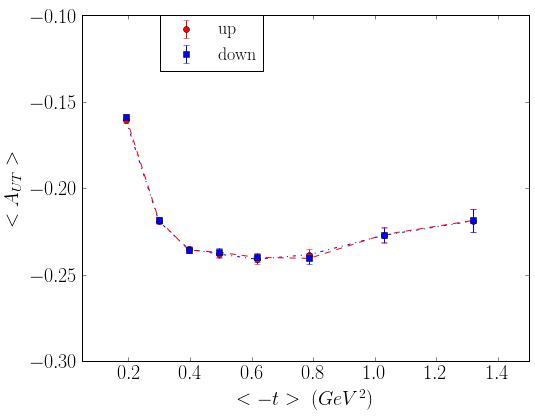

In [4]:
f,axes1 = plt.subplots(1,1, sharex=True, figsize=(8, 6))
f.subplots_adjust(bottom=0.1, top=0.9, hspace=0.02)

# Subplot for Asym.
axes1.plot(t, Asym, 'k-.', color='blue')
axes1.errorbar(t, Asym, yerr=Astat, fmt='o',color='red',label='up')

axes1.plot(t_d, Asym_d, 'k--', color='red')
axes1.errorbar(t_d, Asym_d, yerr=Astat_d, fmt='s',color='blue',label='down')
axes1.set_xlabel('$<-t>~(GeV^{2}$)') # label, y-axis
axes1.set_xlim(0.05, 1.5)
axes1.set_ylabel('$<A_{UT}>$') # label, y-axis
axes1.set_ylim(-0.3, -0.1)

#axes1.text(0.8, -0.25, r'%s'%com)
axes1.legend(bbox_to_anchor=(0.175, 1.0), loc=2, prop={'size':18},borderaxespad=0., numpoints=1)



# Calculating Target-Single Asymmetries, $A_{UT}$

$$
A_{UT} = \frac{1}{f P_T P_n}\frac{N^{\uparrow}-N^{\downarrow}}{N^{\uparrow}+N^{\downarrow}},
\delta A_{UT} = \frac{1}{\sqrt{N^{(\uparrow}+N^{\downarrow})/2}} \frac{\sqrt{1-(f P_T P_n A_{UT})^2}}{f P_T P_n}
$$
where  f=1 (dilution), $P_T$=60% He3 Polarization, $P_n$=86.5% Effective Polarization of Neutron in He3

In [17]:
##  Construct TSA and error
Bin = (N, N1, N2)
AUT  = np.zeros(Bin, dtype=float)  
dAUT = np.zeros(Bin, dtype=float) 
AUT_1m1  = np.zeros(Bin, dtype=float)  
dAUT_1m1 = np.zeros(Bin, dtype=float) 
SinPhi_PhiS  = np.zeros(Bin, dtype=float)  
SinPhiS  = np.zeros(Bin, dtype=float)  

for i in range(0, N):
    for j in range(0, N1):
           for k in range(0, N2):
                SinPhi_PhiS[i][j][k] = sin(PhiH[i][j][k]- PhiS[i][j][k])
                SinPhiS[i][j][k] = sin(PhiS[i][j][k])

                if((Ncnt[i][j][k] + Ncnt_d[i][j][k])>0):
                    AUT[i][j][k] = (Ncnt[i][j][k] - Ncnt_d[i][j][k])/(Ncnt[i][j][k] + Ncnt_d[i][j][k])*1./(0.9*0.6*0.865)
                    dAUT[i][j][k] = 1./sqrt(0.5*(Ncnt[i][j][k] + Ncnt_d[i][j][k]))*sqrt(1.-((0.9*0.6*0.865)*AUT[i][j][k])**2)
                else:
                    AUT[i][j][k] = 0.0
                    dAUT[i][j][k] = 0.0
                    
                if((N1m1[i][j][k] + N1m1_d[i][j][k])>0):
                    AUT_1m1[i][j][k] = (N1m1[i][j][k] - N1m1_d[i][j][k])/(N1m1[i][j][k] + N1m1_d[i][j][k])*1./(0.9*0.6*0.865)
                    dAUT_1m1[i][j][k] = 1./sqrt(0.5*(N1m1[i][j][k] + N1m1_d[i][j][k]))*sqrt(1.-((0.9*0.6*0.865)*AUT_1m1[i][j][k])**2)
                else:
                    AUT_1m1[i][j][k] = 0.0
                    dAUT_1m1[i][j][k] = 0.0

## Produce Histrograms weighted by Asym

In [6]:
import ROOT
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.08/06


In [29]:
I=0
hasym0 = ROOT.TH2F('hasym0', '$\phi_h$ vs $\phi_S ~weighted~ by~ Asym', 12, 0.,360., 12, 0.,360.)
hasym0.SetXTitle('$\phi_h$ (Rad)')
hasym0.SetYTitle('$\phi_S$ (Rad)')
hasym0.GetXaxis().CenterTitle(1)
hasym0.GetYaxis().CenterTitle(1)

hasym1 = hasym0.Clone()
hasym1.SetName('hasym1')
hasym2 = hasym0.Clone()
hasym2.SetName('hasym2')
hasym3 = hasym0.Clone()
hasym3.SetName('hasym3')
hasym4 = hasym0.Clone()
hasym4.SetName('hasym4')
hasym5 = hasym0.Clone()
hasym5.SetName('hasym5')
hasym6 = hasym0.Clone()
hasym6.SetName('hasym6')
hasym7 = hasym0.Clone()
hasym7.SetName('hasym7')

h3asym0 = ROOT.TH3F('h3asym0', '$\phi_h$ vs $\phi_S vs Asym', 12, 0.,360., 12, 0.,360., 12, 0.0,2.0)
h3asym0.SetXTitle('$\phi_h$ (Rad)')
h3asym0.SetYTitle('$\phi_S$ (Rad)')
h3asym0.SetZTitle('$A_{UT}$')
h3asym0.GetXaxis().CenterTitle(1)
h3asym0.GetYaxis().CenterTitle(1)
h3asym0.GetZaxis().CenterTitle(1)

h3asym1 = h3asym0.Clone()
h3asym1.SetName('h3asym1')
h3asym2 = h3asym0.Clone()
h3asym2.SetName('h3asym2')
h3asym3 = h3asym0.Clone()
h3asym3.SetName('h3asym3')
h3asym4 = h3asym0.Clone()
h3asym4.SetName('h3asym4')
h3asym5 = h3asym0.Clone()
h3asym5.SetName('h3asym5')
h3asym6 = h3asym0.Clone()
h3asym6.SetName('h3asym6')
h3asym7 = h3asym0.Clone()
h3asym7.SetName('h3asym7')


for j in range(0, N1):
    for k in range(0, N2):
        I=0
        hasym0.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym0.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])

        I=1
        hasym1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym1.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        
        I=2
        hasym2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym2.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        
        I=3
        hasym3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym3.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])

        I=4
        hasym4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym4.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        
        I=5
        hasym5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym5.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        
        I=6
        hasym6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym6.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        
        I=7
        hasym7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])
        h3asym7.Fill(PhiH[I][j][k]/Deg2Rad, PhiS[I][j][k]/Deg2Rad, 1.+AUT[I][j][k])

hist_file = ROOT.TFile('histo_asym.root','recreate')
hasym0.Write()
hasym1.Write()
hasym2.Write()
hasym3.Write()
hasym4.Write()
hasym5.Write()
hasym6.Write()
hasym7.Write()

h3asym0.Write()
h3asym1.Write()
h3asym2.Write()
h3asym3.Write()
h3asym4.Write()
h3asym5.Write()
h3asym6.Write()
h3asym7.Write()

hist_file.Close()

Warning in <TROOT::Append>: Replacing existing TH1: hasym0 (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h3asym0 (Potential memory leak).


## Make Asymmetries vs.   ($\phi_h$, $\phi_S$) Plots for 8 t-bins

In [30]:
c = ROOT.TCanvas("c","c",800,1200)
ROOT.enableJSVis()
c.Divide(2,4)

c.cd(1)
hasym0.Draw('colz')

c.cd(2)
hasym1.Draw('colz')

c.cd(3)
hasym2.Draw('colz')

c.cd(4)
hasym3.Draw('colz')

c.cd(5)
hasym4.Draw('colz')

c.cd(6)
hasym5.Draw('colz')

c.cd(7)
hasym6.Draw('colz')

c.cd(8)
hasym7.Draw('colz')

c.Draw()
#ROOT.disableJSVis()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


## Make Asymmetry vs $sin(\phi_h-\phi_S)$ for one t-bin

In [16]:
I=7

c1 = ROOT.TCanvas("c1","c1",800,600)
ROOT.enableJSVis()
c1.cd()

hphi = ROOT.TH2F('hphi', 'Asym vs. sin($\phi_h$ -$\phi_S$)', 12, -1.3,1.3, 12, -2.3,2.3)
hphi.SetXTitle('sin($\phi_h$ -$\phi_S$')
hphi.SetYTitle('$A_{UT}^{sin(\phi_h -\phi_S})$')
hphi.GetXaxis().CenterTitle(1)
hphi.GetYaxis().CenterTitle(1)

for j in range(0, N1):
    for k in range(0, N2):
        hphi.Fill(SinPhi_PhiS[i][j][k], AUT_1m1[I][j][k])
hphi.Draw('colz')
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TROOT::Append>: Replacing existing TH1: hphi (Potential memory leak).


# Asymmetry Fitting

## Load Data from one -t bin

In [19]:
## Load only one bin
def LoadData(iii):
    phi_S1 = np.zeros((N1,N2), dtype=float)
    phi_H1 = np.zeros((N1,N2), dtype=float)
    F_UT1 = np.zeros((N1,N2), dtype=float)
    dF_UT1 = np.zeros((N1,N2), dtype=float)
    F_UU1 = np.zeros((N1,N2), dtype=float)
    F_UT_TEST1 = np.zeros((N1,N2), dtype=float)
    for j in range(0, N1):
        for k in range(0,N2):
            phi_S1[j][k] = PhiS[iii][j][k]
            phi_H1[j][k] = PhiH[iii][j][k]
            F_UT1[j][k] = AUT[iii][j][k]
            dF_UT1[j][k] = dAUT[iii][j][k]
            #F_UT1[j][k] = AUT_1m1[iii][j][k]
            #dF_UT1[j][k] = dAUT_1m1[iii][j][k]
            
    return phi_S1, phi_H1, F_UT1, dF_UT1

## Using Maximum-Likelihood Fit

### Fitting Function 1:

In [20]:
 def likfunc1(parms):
    a = parms[0]
    b = parms[1]
    sigma = parms[2]

    Sum = 0 
    asym_fit  = np.zeros(N1*N2, dtype=float)
    asym_data = np.zeros(N1*N2, dtype=float)
    N=0
    for j in range(0, N1):
        for k in range(0,N2):
            #constant term corresponds to unpolarized XS, =1 if normalized
            asym_fit[N]  = a+b * sin(phi_H[j][k] - phi_S[j][k]) ##A_UT^sin(3phi_H+phi_S)
            asym_data[N] = F_UT[j][k]
            Sum += ((asym_fit[N]-asym_data[N]))**2
            N+=1
              
    #L = -0.5*(N*np.log(2*np.pi) + N*np.log(sigma**2) + Sum/sigma**2)
    L = -0.5*np.sum( stats.norm.logpdf(asym_data, loc=asym_fit, scale=sigma ) )
    
    return L

### Fitting Function 2:

In [21]:
 def likfunc2(parms):
    a = parms[0]
    b = parms[1]

    L = 0.0
    for j in range(0, N1):
        for k in range(0,N2):
            #a=1
            #constant term corresponds to unpolarized XS, =1 if normalized
            asym  = a+(b * sin(phi_H[j][k] - phi_S[j][k])) ##A_UT^sin(3phi_H+phi_S)
            L += np.log((asym/a))
    L -= np.log(N1*N2*1.0)
    L*=-1.0
    
    return L

### Do the ML Fit:

In [22]:
I=5
phi_S, phi_H, F_UT, dF_UT = LoadData(I)

In [23]:
## Fitting
lik_coeff=[1.0, Asym[I], 1.0]

#METH = 'L-BFGS-B'
METH = 'Nelder-Mead'
#METH = 'SLSQP'
lik_model = scipy.optimize.minimize(likfunc1, lik_coeff, method=METH,options={'disp': True})

A_UU = lik_model['x'][0]
A_UT = lik_model['x'][1]
Sigma = lik_model['x'][2]

print "A_avg = %f,  A_fit = %f, A_UU = %f, Sigma=%f"%(Asym[I], A_UT, A_UU, Sigma )

Optimization terminated successfully.
         Current function value: -24.374382
         Iterations: 92
         Function evaluations: 168
A_avg = -0.238490,  A_fit = 0.019857, A_UU = 0.024705, Sigma=0.172475
